# Todo : 

* Study Tf-idf and use it with SVM
* Study 1D Convolutional Neural networks
* Convert visualizations to Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['handle','text','is_retweet','original_author','source_url']

tweets  = pd.read_csv("tweets.csv",usecols=columns)

In [3]:
tweets.head()

,handle,text,is_retweet,original_author,source_url
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,https://studio.twitter.com
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,http://twitter.com
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,https://about.twitter.com/products/tweetdeck
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,https://about.twitter.com/products/tweetdeck


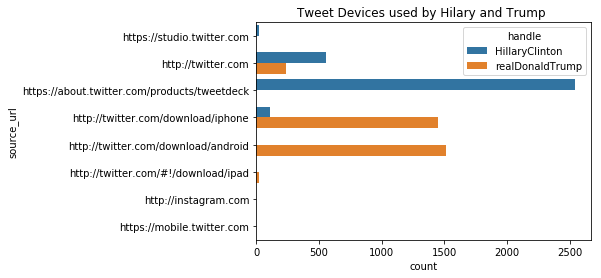

In [4]:
sns.countplot(y='source_url', hue = 'handle', data=tweets)
plt.title('Tweet Devices used by Hilary and Trump ')

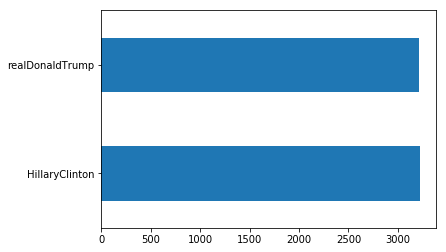

In [5]:
tweets['handle'].value_counts().plot(kind='barh')

In [6]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [7]:
tokenized_tweets = []

for tweet in tweets['text']:
    tokenized_tweets.append(tknzr.tokenize(tweet))

In [8]:
tweets['tokenized_tweets'] = pd.Series(tokenized_tweets)

In [9]:
hilary = tweets[tweets['handle']=='HillaryClinton']
trump = tweets[tweets['handle']=='realDonaldTrump']

In [10]:
hilary_hashtags = []
for sentences in hilary['tokenized_tweets']:
    for token in sentences:
        if token.startswith('#'):
            hilary_hashtags.append(token)

''

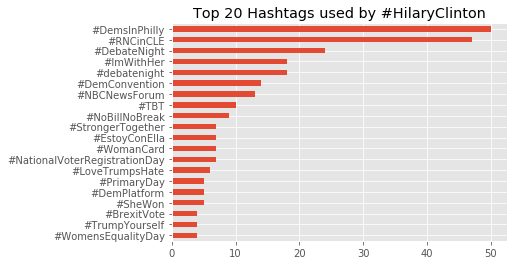

In [11]:
plt.style.use('ggplot')
pd.Series(hilary_hashtags).value_counts(ascending=True)[-20:].plot(kind='barh')
plt.title("Top 20 Hashtags used by #HilaryClinton")
plt.figure(figsize=(12,10))
;

In [12]:
trump_hashtags = []
for sentences in trump['tokenized_tweets']:
    for token in sentences:
        if token.startswith('#'):
            trump_hashtags.append(token)

''

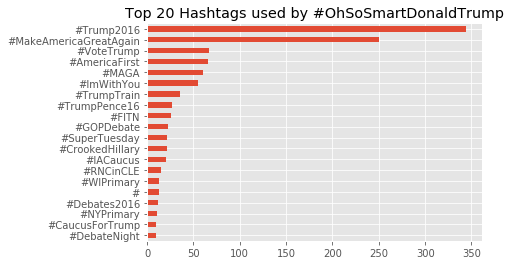

In [13]:
plt.style.use('ggplot')
pd.Series(trump_hashtags).value_counts(ascending=True)[-20:].plot(kind='barh')
plt.title("Top 20 Hashtags used by #OhSoSmartDonaldTrump")
plt.figure(figsize=(12,10))
;

# Corpus making

In [75]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english') + ['','-',';','"',""]

In [82]:
def clean_tweets(tweet):
    cleaned_tweet = [re.sub('[^A-Za-z0-9@#.]+', ' ', token) for token in tweet]
    cleaned_tweet = [token for token in tweet if token not in stopwords_list]
    return cleaned_tweet
        

In [104]:
tweets['tokenized_tweets'] = tweets['tokenized_tweets'].apply(lambda x:clean_tweets(x))

In [78]:
import re

In [28]:
re.sub('[^A-Za-z0-9@#.]+', ' ', ":")

' '

In [73]:
re.sub('#@[\\W+]','',"don't")

"don't"

In [103]:
tweets[(tweets['handle'] == 'realDonaldTrump') & (tweets['is_retweet']==True)]['original_author'].value_counts()

EricTrump          17
DRUDGE_REPORT       9
DonaldJTrumpJr      8
DanScavino          8
TeamTrump           6
AnnCoulter          5
IvankaTrump         4
JoeNBC              4
foxandfriends       3
RSBNetwork          3
RealBenCarson       3
CLewandowski_       3
LouDobbs            2
Carl_C_Icahn        2
gatewaypundit       2
greta               2
seanhannity         2
NRA                 2
mike_pence          2
KellyannePolls      2
GOP                 2
IngrahamAngle       1
Reince              1
Morning_Joe         1
namusca             1
robertjeffress      1
piersmorgan         1
realDonaldTrump     1
GeraldoRivera       1
JaniceTaylor912     1
williebosshog       1
AdrianaCohen16      1
FieldofFight        1
rupertmurdoch       1
JohnStossel         1
TomOdell            1
GMA                 1
BarackObama         1
ErinBurnett         1
FoxBusiness         1
CBSNews             1
MarkHalperin        1
GovMikeHuckabee     1
ScottAdamsSays      1
BretEastonEllis     1
dmartosko 

In [101]:
tweets[(tweets['handle'] == 'HillaryClinton') & (tweets['is_retweet']==True)]['original_author'].value_counts()

TheBriefing2016    79
HFA                56
timkaine           42
Hillary_esp        22
JoeBiden           15
johnpodesta        12
mayaharris_        11
BernieSanders       9
rosenbergerlm       8
ChelseaClinton      7
Jorge_Silva         7
Ann_OLeary          7
mikereedschmidt     6
elizabethforma      6
billclinton         6
lorellapraeli       6
WhiteHouse          5
dominiclowell       5
HillaryforVA        5
HillaryforPA        5
nytimes             4
POTUS               4
repjohnlewis        4
mpshapiro           4
GabbyGiffords       4
jmurray20           4
MarlonDMarshall     3
TheDemocrats        3
BuzzFeed            3
sarajacobs89        3
                   ..
jasoncollins98      1
CNBCnow             1
originalgriz        1
Newsweek            1
mikiebarb           1
businessinsider     1
YoungPwD4HRC        1
PolitiFact          1
NPR                 1
tedcruz             1
HillaryforNH        1
MSNBC               1
ConstanceZimmer     1
AFLCIO              1
Everytown 

In [105]:
original_tweets = tweets[tweets['is_retweet']==False]

In [108]:
corpus = original_tweets['tokenized_tweets']

In [109]:
target = original_tweets['handle']

In [112]:
import string

In [117]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [110]:
corpus

0       [The, question, election, :, Who, put, plans, ...
3       [If, stand, together, ,, there's, nothing, can...
4       [Both, candidates, asked, they'd, confront, ra...
5       [Join, 3pm, rally, tomorrow, Mid-America, Cent...
6       [This, election, important, sit, ., Go, https:...
7       [When, Donald, Trump, goes, low, ..., register...
8       [Once, ,, government, ,, people, ., Join, MOVE...
12      [Hillary, Clinton's, Campaign, Continues, To, ...
13      [', CNBC, ,, Time, magazine, online, polls, sa...
14      [Donald, Trump, lied, American, people, least,...
15      [Great, afternoon, Little, Havana, Hispanic, c...
16      [In, last, 24, hrs, ., raised, $, 13M, online,...
17      [“, She, gained, 55, pounds, ..., 9, months, ....
18      [It's, #NationalVoterRegistrationDay, ., Celeb...
19      [I, love, country, ., I, ’, proud, country, .,...
20      [We, ’, want, turn, ., We, want, work, one, an...
21      [What, hear, opponent, dangerously, incoherent...
22      [One, 